# Classification

<img src='https://images.tpointtech.com/tutorial/machine-learning/images/classification-algorithm-in-machine-learning.png'>

In [3]:
import pandas as pd
pd.set_option('display.max_columns', 100)

import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

# Read Data

In [5]:
df=pd.read_csv('hr_data.csv')

## EDA

In [7]:
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,2,5993.0,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,1,5130.0,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,2,2090.0,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,1,2909.0,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,1,3468.0,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,No


In [8]:
df.sample()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
446,41,Non-Travel,267,Sales,10,2,Life Sciences,1,599,4,Male,56,3,2,Sales Executive,4,2,6230.0,13430,7,Y,No,14,3,4,80,0,16,3,3,14,3,1,10,No


In [9]:
df['Attrition'].unique()

array(['Yes', 'No', nan], dtype=object)

In [10]:
df['Attrition'].isnull().sum()

265

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   BusinessTravel            1470 non-null   object 
 2   DailyRate                 1470 non-null   int64  
 3   Department                1470 non-null   object 
 4   DistanceFromHome          1470 non-null   int64  
 5   Education                 1470 non-null   int64  
 6   EducationField            1470 non-null   object 
 7   EmployeeCount             1470 non-null   int64  
 8   EmployeeNumber            1470 non-null   int64  
 9   EnvironmentSatisfaction   1470 non-null   int64  
 10  Gender                    1470 non-null   object 
 11  HourlyRate                1470 non-null   int64  
 12  JobInvolvement            1470 non-null   int64  
 13  JobLevel                  1470 non-null   int64  
 14  JobRole 

<Axes: xlabel='Attrition', ylabel='count'>

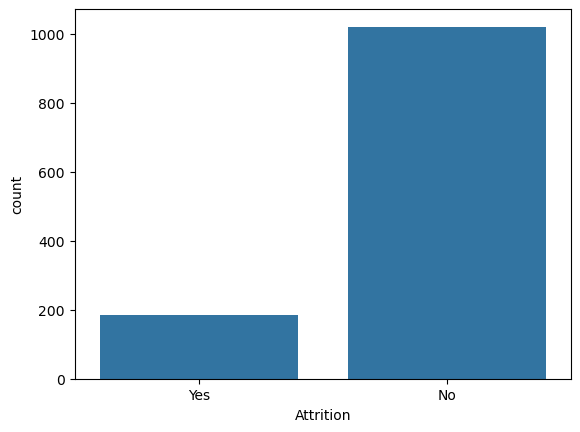

In [12]:
sns.countplot(x=df.Attrition)
#işten ayrılanların grafiğini buluyoruz

In [13]:
d={'No':0,'Yes':1}

In [14]:
df.Attrition=df.Attrition.map(d)

In [15]:
df

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,2,5993.0000,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,1.0
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,1,5130.0000,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,0.0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,2,2090.0000,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,1.0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,1,2909.0000,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,0.0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,1,3468.0000,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,1,5756.3269,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3,NaN
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,1,9991.0000,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7,0.0
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,1,6142.0000,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3,0.0
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,1,5390.0000,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8,0.0


<Axes: xlabel='Attrition', ylabel='count'>

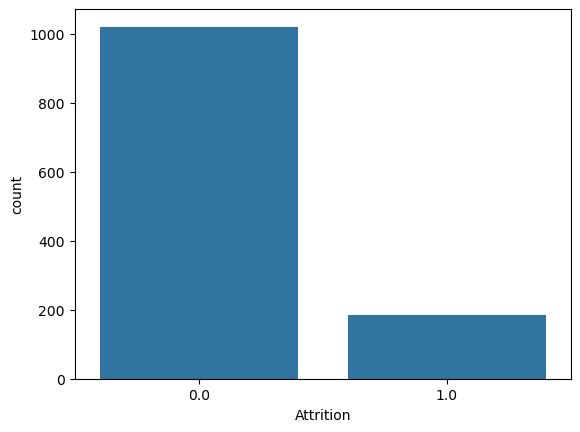

In [16]:
sns.countplot(x=df.Attrition)

In [17]:
df.Attrition.value_counts(normalize=True)

Attrition
0.0    0.846473
1.0    0.153527
Name: proportion, dtype: float64

In [18]:
df.isnull().sum()

Age                           0
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtCompany                0
YearsInC

In [24]:
bos=df[df['Attrition'].isnull()]
dolu=df[df['Attrition'].notnull()]

In [26]:
x=dolu.drop('Attrition', axis=1)
y=dolu[['Attrition']]

In [28]:
x=pd.get_dummies(x, drop_first=True)

In [30]:
from sklearn.model_selection import train_test_split

In [32]:
x_train,x_test, y_train,y_test=train_test_split(x,y, test_size=.20, random_state=42)

In [88]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

In [68]:
g=GaussianNB()

In [96]:
b=BernoulliNB()

In [98]:
g.fit(x_train,y_train)

GaussianNB()

In [100]:
b.fit(x_train,y_train)

BernoulliNB()

In [102]:
gtahmin=g.predict(x_test)

In [104]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [106]:
accuracy_score(y_test,gtahmin)

0.7883817427385892

In [108]:
btahmin=b.predict(x_test)

In [110]:
accuracy_score(y_test,btahmin)

0.8257261410788381

In [112]:
confusion_matrix(y_test,btahmin)

array([[192,  19],
       [ 23,   7]])

In [114]:
confusion_matrix(y_test,gtahmin)

array([[171,  40],
       [ 11,  19]])

<Axes: >

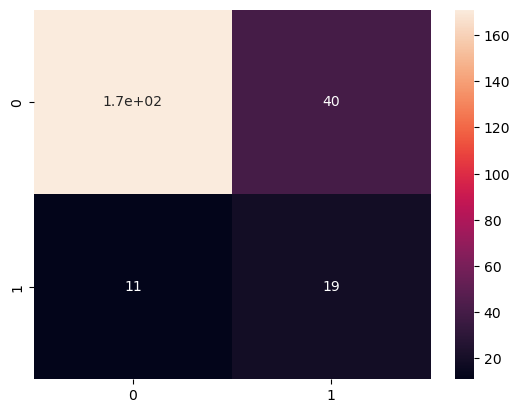

In [118]:
sns.heatmap(confusion_matrix(y_test,gtahmin),annot=True)

In [120]:
print(classification_report(y_test,gtahmin))

              precision    recall  f1-score   support

         0.0       0.94      0.81      0.87       211
         1.0       0.32      0.63      0.43        30

    accuracy                           0.79       241
   macro avg       0.63      0.72      0.65       241
weighted avg       0.86      0.79      0.82       241



In [124]:
from sklearn.linear_model import LogisticRegression

In [128]:
L=LogisticRegression()

In [130]:
L.fit(x_train,y_train)

LogisticRegression()

In [134]:
Ltahmin=L.predict(x_test)

In [136]:
accuracy_score(y_test,Ltahmin)

0.8672199170124482

In [138]:
confusion_matrix(y_test,Ltahmin)

array([[209,   2],
       [ 30,   0]])

<Axes: >

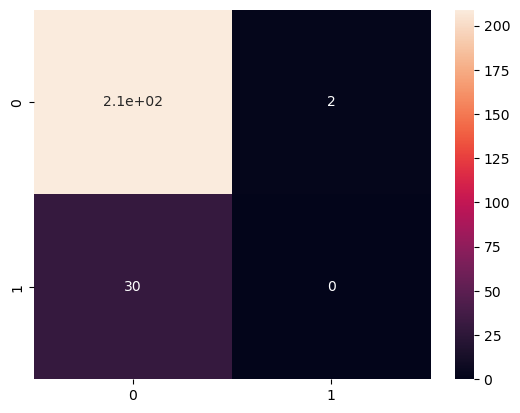

In [142]:
sns.heatmap(confusion_matrix(y_test,Ltahmin),annot=True)

In [144]:
from sklearn.tree import DecisionTreeClassifier

In [146]:
d=DecisionTreeClassifier()

In [148]:
d.fit(x_train,y_train)

DecisionTreeClassifier()

In [180]:
dtahmin=d.predict(x_test)

In [182]:
accuracy_score(y_test,dtahmin)

0.7800829875518672

In [184]:
confusion_matrix(y_test,dtahmin)

array([[177,  34],
       [ 19,  11]])

In [186]:
from sklearn.ensemble import GradientBoostingClassifier

In [188]:
h=GradientBoostingClassifier()

In [190]:
h.fit(x_train,y_train)

GradientBoostingClassifier()

In [191]:
htahmin=L.predict(x_test)

In [194]:
accuracy_score(y_test,htahmin)

0.8672199170124482

In [196]:
confusion_matrix(y_test,htahmin)

array([[209,   2],
       [ 30,   0]])

In [199]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

b = BernoulliNB()
l = LogisticRegression()
d = DecisionTreeClassifier()
r = RandomForestClassifier()
gb= GradientBoostingClassifier()
kn= KNeighborsClassifier()
ab= AdaBoostClassifier()
mn= MultinomialNB()

def algo_test(x, y):
    modeller=[ b, l, d, r, gb, kn, ab, mn]
    isimler=["BernoulliNB", "LogisticRegression", "DecisionTreeClassifier", 
             "RandomForestClassifier", "GradientBoostingClassifier", "KNeighborsClassifier",
             "AdaBoostClassifier", "MultinomialNB"]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state = 42)
    
    accuracy = []
    precision = []
    recall = []
    f1 = []
    mdl=[]

    print("Veriler hazır modeller deneniyor")
    for model in modeller:
        print(model, " modeli eğitiliyor!..")
        model=model.fit(x_train,y_train)
        tahmin=model.predict(x_test)
        mdl.append(model)
        accuracy.append(accuracy_score(y_test, tahmin))
        precision.append(precision_score(y_test, tahmin, average="micro"))
        recall.append(recall_score(y_test, tahmin, average="micro"))
        f1.append(f1_score(y_test, tahmin, average="micro"))
        print(confusion_matrix(y_test, tahmin))

    print("Eğitim tamamlandı.")
    
    metrics=pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1", "Model"], index=isimler)
    metrics["Accuracy"] = accuracy
    metrics["Precision"] = precision  
    metrics["Recall"] = recall
    metrics["F1"] = f1
    metrics["Model"]=mdl

    metrics.sort_values("F1", ascending=False, inplace=True)

    print("En başarılı model: ", metrics.iloc[0].name)
    model=metrics.iloc[0,-1]
    tahmin=model.predict(np.array(x_test) if model==kn else x_test)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, tahmin))
    print("classification Report:")
    print(classification_report(y_test, tahmin))
    print("Diğer Modeller:")
    
    return metrics.drop("Model", axis=1)



In [209]:
algo_test(x, y)

Veriler hazır modeller deneniyor
BernoulliNB()  modeli eğitiliyor!..
[[290  27]
 [ 31  14]]
LogisticRegression()  modeli eğitiliyor!..
[[315   2]
 [ 44   1]]
DecisionTreeClassifier()  modeli eğitiliyor!..
[[278  39]
 [ 34  11]]
RandomForestClassifier()  modeli eğitiliyor!..
[[316   1]
 [ 40   5]]
GradientBoostingClassifier()  modeli eğitiliyor!..
[[312   5]
 [ 37   8]]
KNeighborsClassifier()  modeli eğitiliyor!..
[[306  11]
 [ 45   0]]
AdaBoostClassifier()  modeli eğitiliyor!..
[[304  13]
 [ 33  12]]
MultinomialNB()  modeli eğitiliyor!..
[[164 153]
 [ 15  30]]
Eğitim tamamlandı.
En başarılı model:  RandomForestClassifier
Confusion Matrix:
[[316   1]
 [ 40   5]]
classification Report:
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       317
         1.0       0.83      0.11      0.20        45

    accuracy                           0.89       362
   macro avg       0.86      0.55      0.57       362
weighted avg       0.88      0.89  

,Accuracy,Precision,Recall,F1
RandomForestClassifier,0.886740,0.886740,0.886740,0.886740
GradientBoostingClassifier,0.883978,0.883978,0.883978,0.883978
LogisticRegression,0.872928,0.872928,0.872928,0.872928
AdaBoostClassifier,0.872928,0.872928,0.872928,0.872928
KNeighborsClassifier,0.845304,0.845304,0.845304,0.845304
BernoulliNB,0.839779,0.839779,0.839779,0.839779
DecisionTreeClassifier,0.798343,0.798343,0.798343,0.798343
MultinomialNB,0.535912,0.535912,0.535912,0.535912
